# Digit Recognizer

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.datasets import mnist

# for Multi-layer Perceptron (MLP) model
from keras.models import Sequential
from keras.layers import Dense

from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


# Loading Dataset

In [2]:
train = pd.read_csv('/home/oliver/Documents/DL_Kaggle/Digit/train.csv')
print (train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('/home/oliver/Documents/DL_Kaggle/Digit/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separating the labels from training dataset and making it as x_label
y_train = train['label']
x_train = train.drop(labels=['label'],axis=1)
x_test = test

# Frequency of the digits in the dataset
#print(y_train.value_counts())

In [5]:
# Set values of the Data
x_train = x_train.values.astype('float32') # pixel values of all images in train set
y_train = y_train.values.astype('int32') # labels of all images
x_test = test.values.astype('float32') # pixel values of all images in test set

# Plotting Images and their class value

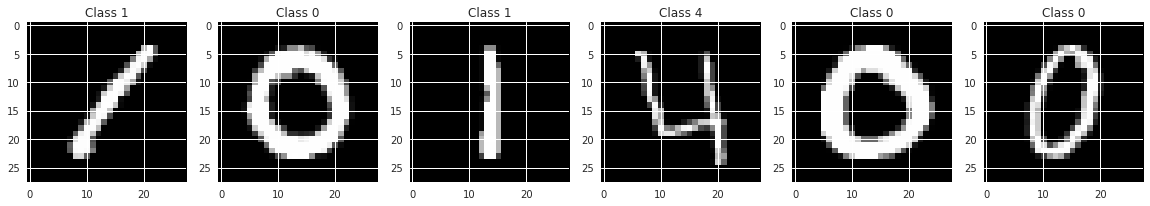

In [6]:
plt.figure(figsize=[20,8])
for i in range(6):
    plt.subplot(1,6,i+1)
    # Here, we reshape the 784 pixels vector values into 28x28 pixels image
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [7]:
# fix random seed for reproducibility
random_seed = 7
np.random.seed(random_seed)

# Normalizing the Input

In [8]:
# normalize inputs from 0-255 to 0-1 as pixel values are gray scale between 0 and 255
x_train = x_train / 255
x_test = x_test / 255

# Converting Output into one hot code
A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1 and as this is a multi classification problem so we can convert the output class values into one-hot format which is simply a binary matrix, i.e.

value 0 will be converted to one-hot format as [1, 0, 0, 0, 0, 0, 0, 0, 0]

value 1 will be converted to one-hot format as [0, 1, 0, 0, 0, 0, 0, 0, 0] etc

In [9]:
# one hot encode outputs'
Y_train = np_utils.to_categorical(y_train)
num_classes = Y_train.shape[1]

# Splitting Dataset Into Training and Validation
We split the train dataset into two parts in 9:1 ratio. 90% will be the actual training set and the remaining 10% will be the validation/testing set.

In [10]:
# Split in Training set and Validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, Y_train, test_size = 0.10, random_state=random_seed)
print (x_train.shape, y_train.shape, x_val.shape, y_val.shape)
num_pixels = x_train.shape[1]

(37800, 784) (37800, 10) (4200, 784) (4200, 10)


In [11]:
# converting one-hot format of digits to normal values/labels
print(y_val)
Y_val = np.argmax(y_val, 1) # reverse of to_categorical
print (Y_val)
# Note that: small y_val contains values in one-hot format and capital Y_val contains normal digit values

[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]
[1 1 4 ..., 0 2 2]


# Perceptron Model

In [12]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Training the Model

In [13]:
model = baseline_model()
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=200, verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 3s 70us/step - loss: 0.3346 - acc: 0.9056 - val_loss: 0.1731 - val_acc: 0.9481
Epoch 2/10
37800/37800 [==============================] - 2s 66us/step - loss: 0.1388 - acc: 0.9606 - val_loss: 0.1240 - val_acc: 0.9660
Epoch 3/10
37800/37800 [==============================] - 2s 66us/step - loss: 0.0903 - acc: 0.9742 - val_loss: 0.1042 - val_acc: 0.9731
Epoch 4/10
37800/37800 [==============================] - 3s 67us/step - loss: 0.0631 - acc: 0.9818 - val_loss: 0.0927 - val_acc: 0.9757
Epoch 5/10
37800/37800 [==============================] - 2s 66us/step - loss: 0.0462 - acc: 0.9871 - val_loss: 0.0825 - val_acc: 0.9788
Epoch 6/10
37800/37800 [==============================] - 2s 66us/step - loss: 0.0331 - acc: 0.9920 - val_loss: 0.0818 - val_acc: 0.9783
Epoch 7/10
37800/37800 [==============================] - 2s 66us/step - loss: 0.0254 - acc: 0.9939 - val_loss: 0.0780 - val_acc:

In [14]:
scores = model.evaluate(x_val, y_val, verbose=0)
print ('Score: {}'.format(scores[0]))
print ('Accuracy: {}'.format(scores[1]))

Score: 0.08346299774678691
Accuracy: 0.9797619047619047


# Confusion matrix
Confusion Matrix of our MLP model on validation set

In [15]:
predict_class = model.predict_classes(x_val)

In [16]:
import itertools

def plot_confusion_matrix(cm, labels,normalize):
    '''
    Plot confusion matrix of the specified accuracies and labels
    '''
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    
    # Draw ticks
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    # Normalize
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

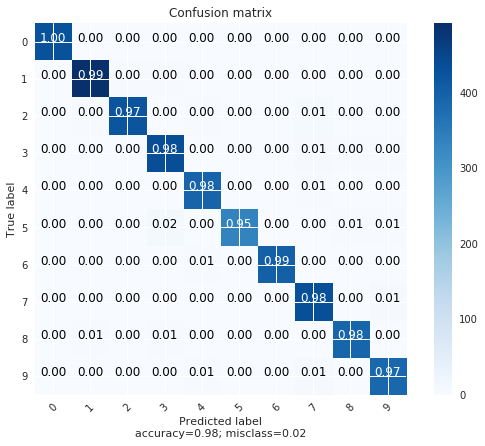

In [17]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = confusion_matrix(Y_val,predict_class)
plot_confusion_matrix(cm,class_names,normalize =True)

# Predicting Output on Test Set
Predicting Output on testset for submitting in kaggle. Got 97% accuracy on test dataset when submitted on Kaggle.

In [19]:
prediction = pd.DataFrame()
imageid = []
for i in range(len(x_test)):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid 
prediction["Label"] = model.predict_classes(x_test, verbose=0)
print(prediction[:2])
prediction.to_csv("prediction_mlp.csv", index=False)

   ImageId  Label
0        1      2
1        2      0
